<a href="https://colab.research.google.com/github/shivankb/credit_card_default_prediction/blob/master/credit_card_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Credit Card Default Prediction**

This project is aimed at predicting the case of customers default payment in Taiwan. From the prospective of risk management, the result of predictive accuracy of estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. we can use the K-S chart to evaluate which customers will default on this credit card payments.


#**Know Your Data**

##Import Libraries and Dataset Loading

In [44]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

In [45]:
# Mounting CSV files from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# Creating data files path and reading the  files
credit_df = pd.read_excel("/content/drive/MyDrive/Credit Card Defaut ML Regression/default of credit card clients.xls")

##Understanding the data

###Dataset first view

In [47]:
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [48]:
credit_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


###Dataset Rows & Columns

In [49]:
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [50]:
credit_df.shape

(30000, 25)

###Dataset Information

In [51]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [52]:
credit_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


###Missing Values/Null Values

In [53]:
credit_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

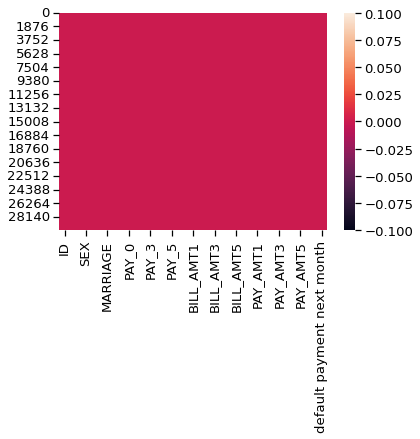

In [54]:
sns.heatmap(credit_df.isnull())

In [55]:
#Writing a define function to obtain variable, dtypes,count,unique,duplicate,missing values in a single dataframe
def show_missing(df):
   
    
    variables = []
    dtypes = []
    count = []
    unique = []
    duplicate = []
    missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        duplicate.append(df.duplicated().sum())
        missing.append(df[item].isna().sum())
        

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'duplicate' : duplicate,
        'missing': missing, 
        
    })    
        
    return output

In [56]:
show_missing(credit_df)

,variable,dtype,count,unique,duplicate,missing
0,ID,int64,30000,30000,0,0
1,LIMIT_BAL,int64,30000,81,0,0
2,SEX,int64,30000,2,0,0
3,EDUCATION,int64,30000,7,0,0
4,MARRIAGE,int64,30000,4,0,0
5,AGE,int64,30000,56,0,0
6,PAY_0,int64,30000,11,0,0
7,PAY_2,int64,30000,11,0,0
8,PAY_3,int64,30000,11,0,0
9,PAY_4,int64,30000,11,0,0


**Findings:**

* From the given dataset we were able to understand that there are total of 25 columns and 30000 rows and all of them have int type variables.
*  we also have 24 independent variables with 'default payment next month' as the dependent variable
*  Dataset is quite clean with no null values as well as no duplicate or missing values

## Data Wrangling

In [57]:
# Renaming the column 'default payment next month' to 'default' and Rename PAY_0 to PAY_1 for convenience
credit_df.rename(columns={'default payment next month': 'default', 'PAY_0':'PAY_1'}, inplace=True)

# # droping column "ID"
# credit_df.drop('ID', axis = 1, inplace =True)

In [58]:
# Making a copy of the dataframe
df = credit_df.copy()

In [59]:
# Creating a new dataframe with categorical variables
categorical_df= df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'default']]

# # Creating a new dataframe with repayment variable
# rep = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [60]:
# Replace values in SEX, MARRIAGE and EDUCATION variables to perform EDA
df['SEX'] = df['SEX'].replace({1:'Male', 2:'Female'})
df['EDUCATION'] = df['EDUCATION'].replace({1:'Graduation', 2:'University', 3:'High_School', 0:'Others', 4:'Others', 5:'Others', 6:'Others'})
df['MARRIAGE'] = df['MARRIAGE'].replace({ 0:'Others', 1:'Married', 2:'Single', 3:'Divorce'})
df.sample(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
17844,17845,20000,Male,High_School,Single,26,3,3,2,0,...,26158,13560,15324,0,25,2000,1000,2000,1000,1
23640,23641,380000,Female,University,Married,39,0,0,0,0,...,252496,253331,238051,12936,9190,9000,8100,8100,8000,0
7407,7408,50000,Female,University,Single,34,-2,-2,-2,-2,...,390,280,720,592,390,390,280,913,390,0


#Visualizations

Mapping the the default ratio

Text(0.5, 1.0, 'COUNT OF CREDIT CARDS')

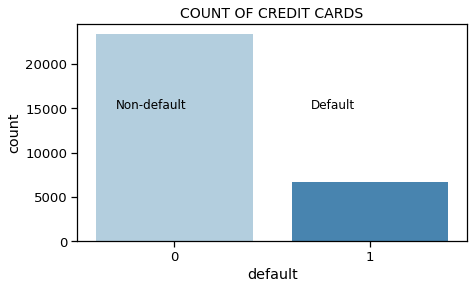

In [61]:
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('default',data=df, palette="Blues")
plt.annotate('Non-default', xy=(-0.3, 15000),size=12)
plt.annotate('Default', xy=(0.7, 15000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)

categorizing
From this sample of 30,000 credit card holders

### Visualizing the data distribution base on SEX

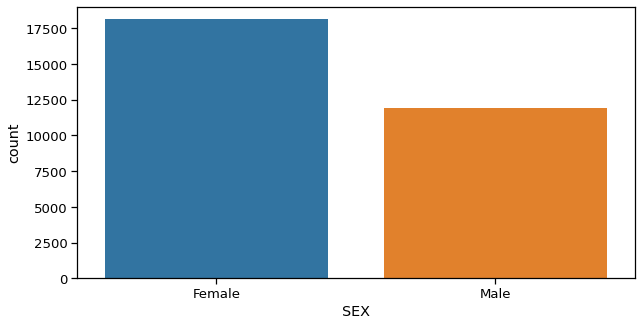

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'SEX', data = df)

**Finding:** There are more female customer than male customers.

### Distribution of Gender v/s Education and then v/s default

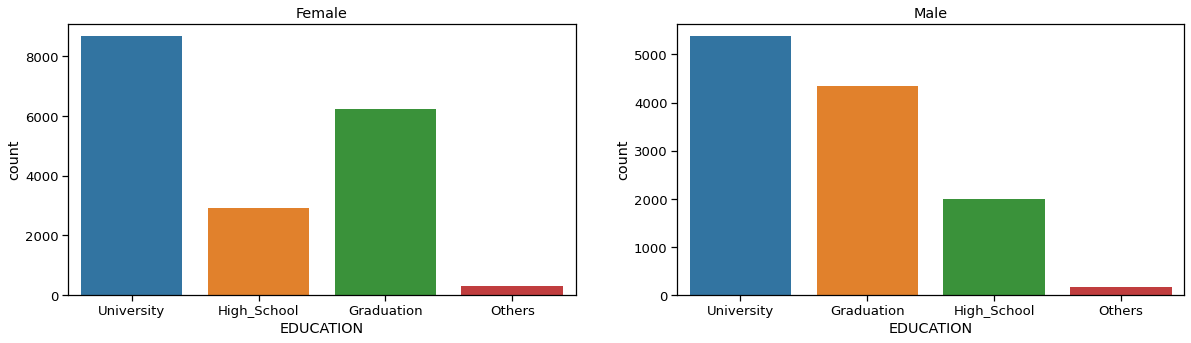

In [63]:
i=1
plt.figure(figsize=(20,5))
for cat in df['SEX'].unique():
  df_temp = df[df['SEX']==cat]
  plt.subplot(1,2,i)
  plt.gca().title.set_text(cat)
  sns.countplot(data=df_temp, x='EDUCATION')
  i=i+1
plt.show()


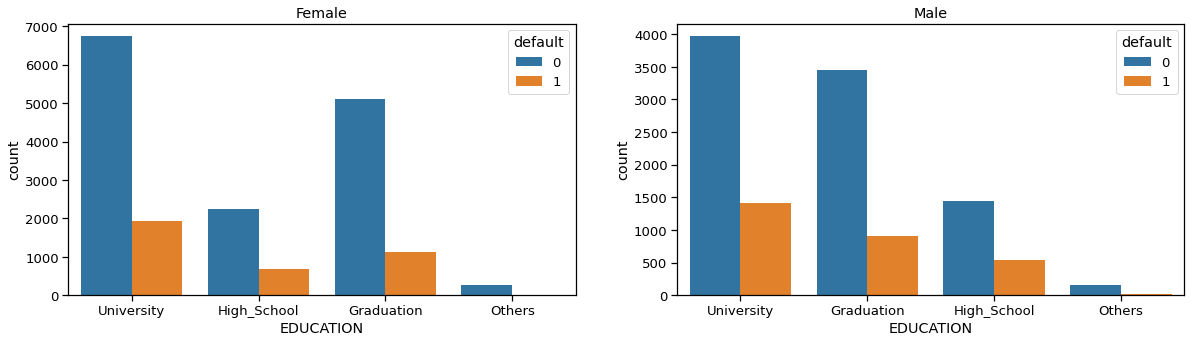

In [64]:
# Distribution of Gender v/s Education v/s default
i=1
plt.figure(figsize=(20,5))
for cat in df['SEX'].unique():
  df_temp = df[df['SEX']==cat]
  plt.subplot(1,2,i)
  plt.gca().title.set_text(cat)
  sns.countplot(data=df_temp, x='EDUCATION', hue='default')
  i=i+1
plt.show()

**Findings:**

* Among both male and female customers, most number of people are University educated followed by Gratuates.
* When we subcategorize each qualification by 'default' status we see a similar distribution as well.

### Distribution of age by marrital status

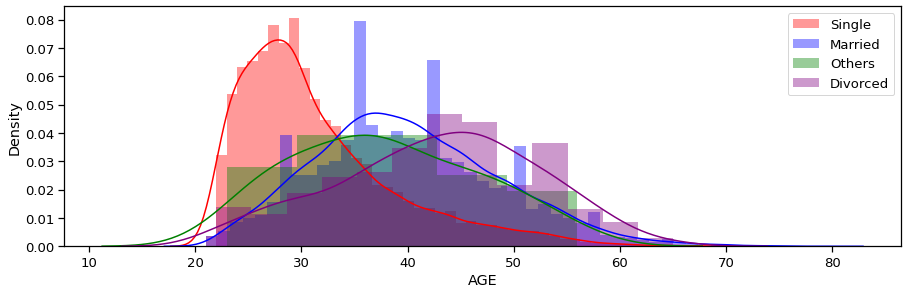

In [65]:
plt.figure(figsize=(15, 15))

plt.subplot(3,1,1)
sns.distplot(df[df['MARRIAGE']=='Single']['AGE'], label='Single', color='red')
sns.distplot(df[df['MARRIAGE']=='Married']['AGE'], label='Married', color='blue')
sns.distplot(df[df['MARRIAGE']=='Others']['AGE'], label='Others', color='green')
sns.distplot(df[df['MARRIAGE']=='Divorce']['AGE'], label='Divorced', color='purple')
plt.legend()

**Findings:**

* Customers between 25 to 35 are mostly Single, 35-45 mostly Married, and above 45 mostly Divorced.

### Distribution of Age of customers

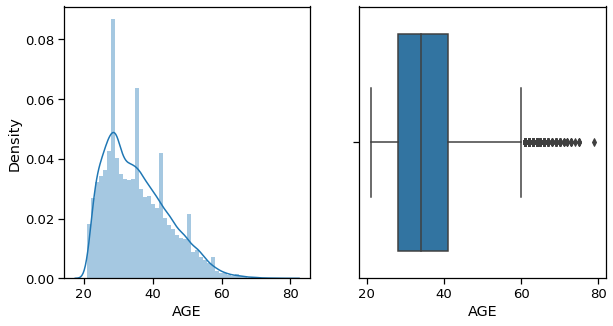

In [66]:
plt.figure(figsize = (15,5))
plt.title('Distribution of customer Age')

plt.subplot(1,3,1)
sns.distplot(df['AGE'])

plt.subplot(1,3,2)
sns.boxplot(df['AGE'])

plt.show()

**Findings:**

* The data spread for AGE is 21 to 79
* Most of the customers fall under the age bracket 25 to 35
* A few outliers after the age of 60
* The histogram shows few peaks around the ages 30, 35, 40 and 50 which indicates more customers for these ages

###Defaulters based on Limit balance

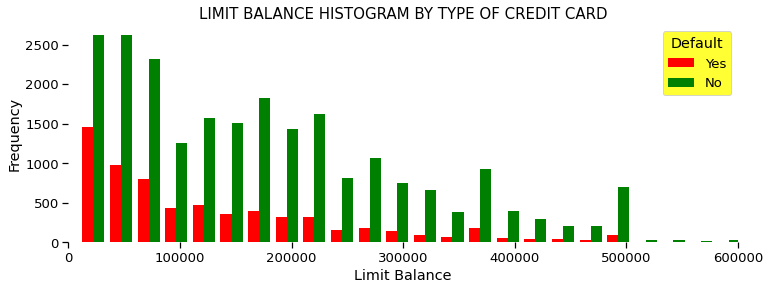

In [67]:
new_1 = list(df[df['default'] == 1]['LIMIT_BAL'])
new_2 = list(df[df['default'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([new_1, new_2], bins = 40, color=['red', 'green'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='yellow')
plt.xlabel('Limit Balance')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

###Defaults based on categorical columns

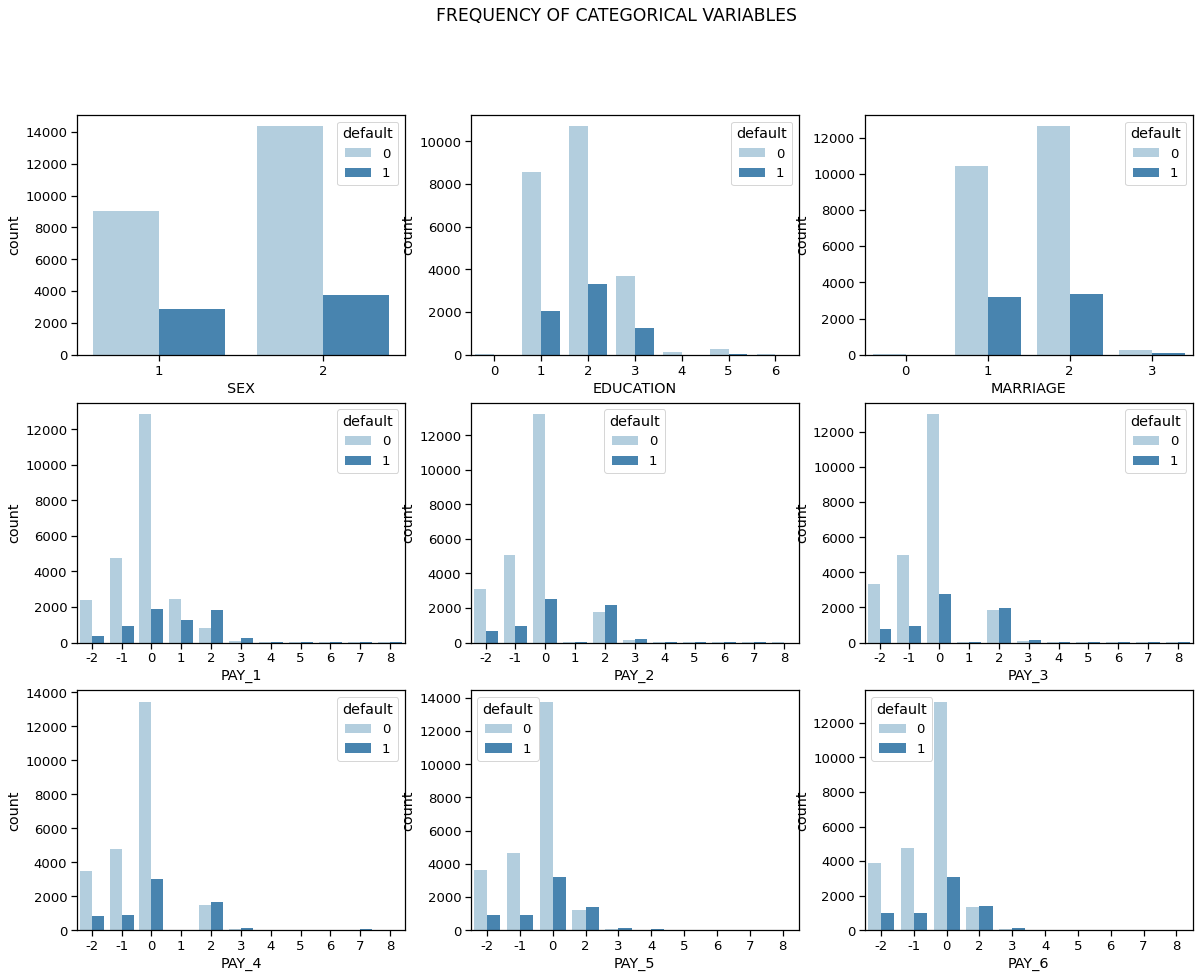

In [68]:
f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES')
ax1 = sns.countplot(x="SEX", hue="default", data=categorical_df, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="default", data=categorical_df, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="default", data=categorical_df, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_1", hue="default", data=categorical_df, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="default", data=categorical_df, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="default", data=categorical_df, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="default", data=categorical_df, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="default", data=categorical_df, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="default", data=categorical_df, palette="Blues", ax=axes[2,2]);

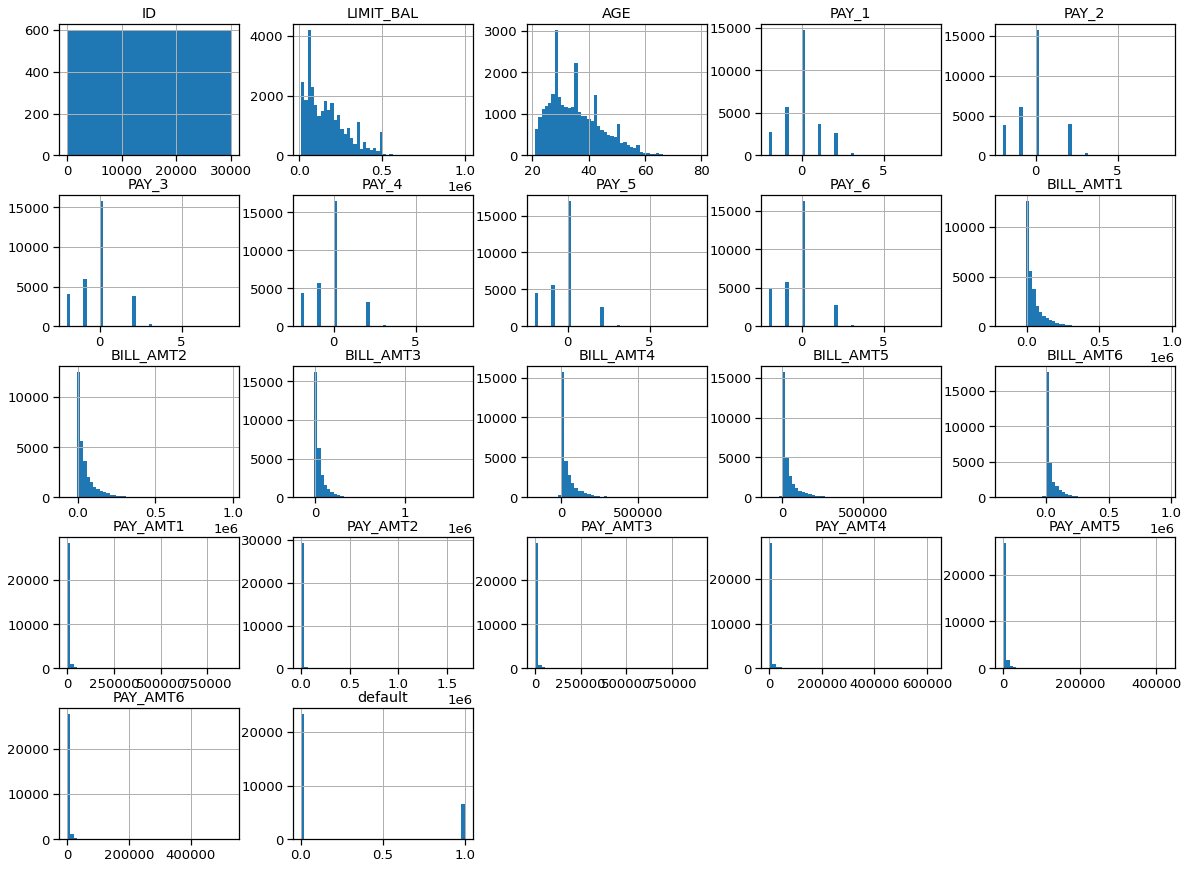

In [69]:
df.hist(bins=50, figsize=(20,15))
plt.show()

#Feature Engineering

Outliers

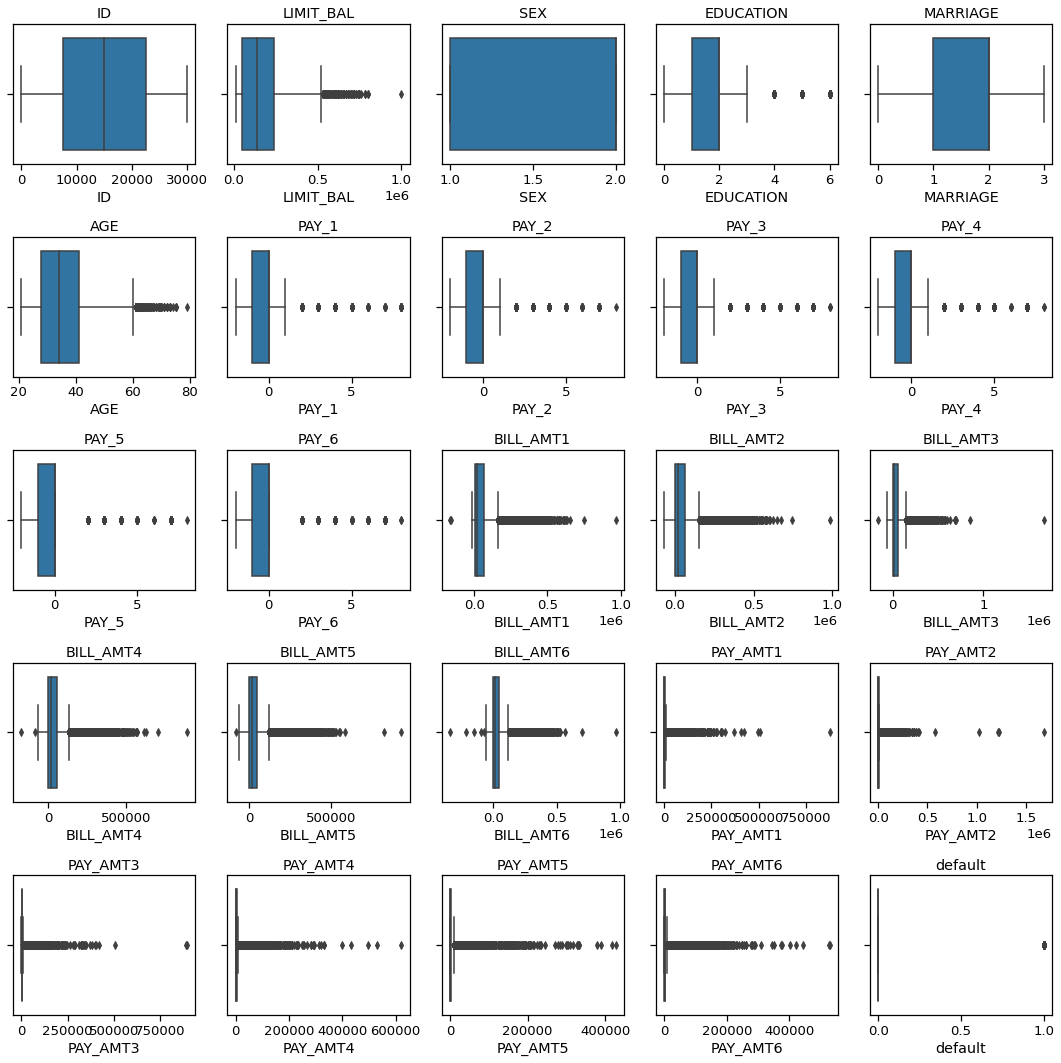

In [70]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(15,15))
axs = axs.flatten()
n_columns = credit_df.shape[1]
for i, ax in enumerate(axs[:n_columns]):
    sns.boxplot(credit_df.iloc[:, i], ax=ax)
    ax.set_title(credit_df.columns[i])
plt.tight_layout()
plt.show()

we have outliers in this dataset but these are the transactions that are actually fraud so it is important to keep it in our dataset to make our model accurate.

### Correlation


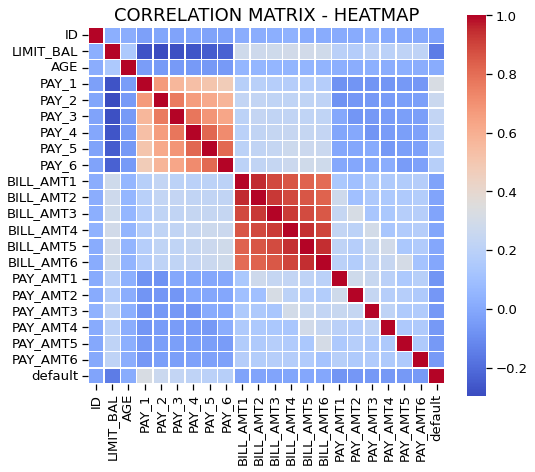

In [71]:
# Check the correlation plot

corr = df.corr()
# corr.style.background_gradient(cmap='coolwarm')


f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

###Lets separately fit correlated and uncorrelated data via linear regression:

In [72]:
#credit_df['EDUCATION'].unique()

In [73]:
credit_df['grad_school']= (credit_df['EDUCATION'] ==1).astype('int')
credit_df['university']= (credit_df['EDUCATION'] == 2).astype('int')
credit_df['high_school']= (credit_df['EDUCATION'] == 3).astype('int')
credit_df.drop('EDUCATION', axis=1, inplace=True)

In [74]:
credit_df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [75]:
credit_df['married'] = (credit_df['MARRIAGE'] == 1). astype('int')
credit_df.drop('MARRIAGE', axis=1, inplace=True)

In [76]:
credit_df['male'] = (credit_df['SEX']==1).astype('int')
credit_df.drop('SEX', axis=1, inplace=True)

In [77]:
#for features is the <= then it means it was not delayed
pay_features = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for p in pay_features:
  credit_df.loc[credit_df[p]<=0, p]=0

###Splitting the Data to Train and Test

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [79]:
target_name = 'default'
X= credit_df.drop('default', axis= 1)
robust_scaler = RobustScaler()
X= robust_scaler.fit_transform(X)
y= credit_df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state= 123, stratify= y)

In [80]:
def CMATRIX(CM, labels=['pay', 'default']):
  df = pd.DataFrame(data=CM, index=labels, columns=labels)
  df.index.name= "TRUE"
  df.columns.name='PREDICTION'
  df.loc['Total'] = df.sum()
  df['Total'] = df.sum(axis=1)
  return df  

###Preparing dataset for model analysis

In [81]:
# data frame for evaluation metrics
metrics = pd.DataFrame(index=['accuracy', 'precision','recall'],
                       columns=['NULL', 'LogisticReg', 'DecisionTree', 'NaiveBayes'])

**Metrics:**
* **Accuracy:** Overall how often the model predicts correctly defaulters and non-defaulters
* **Precison:** When the model predicts default: how often is correct?
* **Recall:** The proportion of actual defaulters that the model will correctly predict as such.

**Which metrics should we use?**
* **False Positive**: A person who willl pay predicted as defaulter
* **False Negative**: A person who default predicted payer

False negative is worse => look fro better recall

###The Null model for comparision

*Unlike regression we are using **Null Model** as a base or benchmark to compare how good our how good our model must be.*

In [82]:
y_pred_test = np.repeat(y_train.value_counts().idxmax(), y_test.size)
metrics.loc['accuracy','NULL'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','NULL'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','NULL'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMATRIX(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,3505,0,3505
default,995,0,995
Total,4500,0,4500


#**Models**

##Logistic Regression

In [83]:
#Importing Library
from sklearn.linear_model import LogisticRegression

#LR
logistic= LogisticRegression(n_jobs=-1, random_state=15)

In [85]:
#Training model using training data
logistic.fit(X_train, y_train)

# Evaluating the model
y_pred_test = logistic.predict(X_test)
metrics.loc['accuracy', 'LogisticReg'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'LogisticReg'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'LogisticReg'] = recall_score(y_pred=y_pred_test, y_true=y_test)

#Confusion matrix
CM = confusion_matrix(y_pred= y_pred_test, y_true= y_test)
CMATRIX(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,3365,140,3505
default,672,323,995
Total,4037,463,4500


##Decision Tree Classifier

In [86]:
#Importing Library
from sklearn.tree import DecisionTreeClassifier

#DTC
decision_t = DecisionTreeClassifier(min_samples_split=30, min_samples_leaf= 10, random_state= 10)

In [87]:
#Traing model using training data
decision_t.fit(X_train, y_train)

# Evaluate the model
y_pred_test = decision_t.predict(X_test)
metrics.loc['accuracy', 'DecisionTree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'DecisionTree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'DecisionTree'] = recall_score(y_pred=y_pred_test, y_true=y_test)

#Confusion matrix
CM = confusion_matrix(y_pred= y_pred_test, y_true= y_test)
CMATRIX(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,3187,318,3505
default,609,386,995
Total,3796,704,4500


##Naive Bayes Classifier

In [89]:
#Importing Library
from sklearn.naive_bayes import GaussianNB

# NBC
naive_ = GaussianNB()

In [90]:
#Training dataset
naive_.fit(X_train, y_train)

# Evaluate the model
y_pred_test = naive_.predict(X_test)
metrics.loc['accuracy', 'NaiveBayes'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'NaiveBayes'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'NaiveBayes'] = recall_score(y_pred=y_pred_test, y_true=y_test)

#Confusion matrix
CM = confusion_matrix(y_pred= y_pred_test, y_true= y_test)
CMATRIX(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,2911,594,3505
default,440,555,995
Total,3351,1149,4500
